In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder


In [ ]:
np.random.seed(42)
skin_df = pd.read_csv('/content/drive/MyDrive/Skin Cancer/HAM10000_metadata.csv')

In [ ]:
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

skin_df['label'] = le.transform(skin_df["dx"])
print(skin_df.sample(10))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization  label  
1617             face      4  
8128  lower extremity      5  
2168             back      4  
1090            trunk      2  
7754          abdomen      5  
8071            trunk      5  
7423  upper extr

<ipython-input-6-26ab01ea0b1a>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age['age'], fit=stats.norm, color='red');


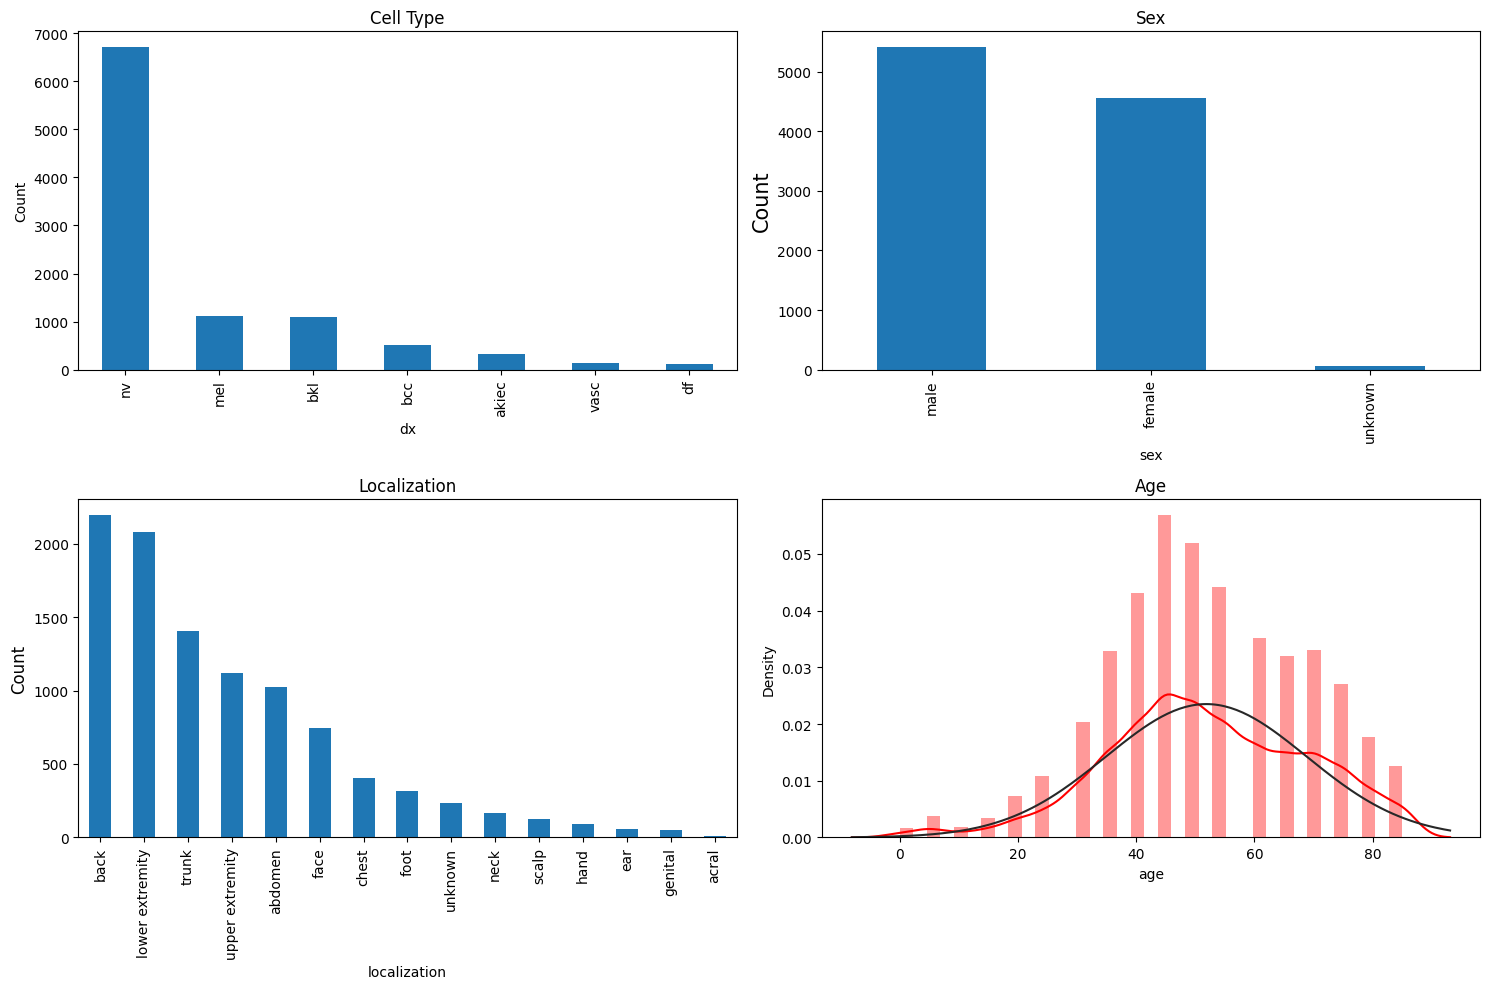

In [ ]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')


ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.utils import resample
print(skin_df['label'].value_counts())

label
5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: count, dtype: int64


In [ ]:
df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

In [ ]:
n_samples=500
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

In [ ]:
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced,
                              df_2_balanced, df_3_balanced,
                              df_4_balanced, df_5_balanced, df_6_balanced])

print(skin_df_balanced['label'].value_counts())

label
0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: count, dtype: int64


In [ ]:
from glob import glob

directory_path = '/content/drive/MyDrive/Skin Cancer/Filtered/'

image_files = glob(directory_path + '*.jpg')

image_path = {file.split('/')[-1].split('.')[0]: file for file in image_files}

skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)

In [ ]:
print(skin_df_balanced['path'])

9789    /content/drive/MyDrive/Skin Cancer/Filtered/IS...
9957    /content/drive/MyDrive/Skin Cancer/Filtered/IS...
9793    /content/drive/MyDrive/Skin Cancer/Filtered/IS...
9758    /content/drive/MyDrive/Skin Cancer/Filtered/IS...
9875    /content/drive/MyDrive/Skin Cancer/Filtered/IS...
                              ...                        
2375    /content/drive/MyDrive/Skin Cancer/Filtered/IS...
2436    /content/drive/MyDrive/Skin Cancer/Filtered/IS...
2453    /content/drive/MyDrive/Skin Cancer/Filtered/IS...
2377    /content/drive/MyDrive/Skin Cancer/Filtered/IS...
2363    /content/drive/MyDrive/Skin Cancer/Filtered/IS...
Name: path, Length: 3500, dtype: object


In [ ]:
import pandas as pd

replacement_path = '/content/drive/MyDrive/Skin Cancer/Skin Cancer/ISIC_0024306.jpg'

skin_df_balanced['path'].fillna(replacement_path, inplace=True)

In [ ]:
# skin_df_balanced Skipped due to RAM issues

In [ ]:
SIZE = 128
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

In [ ]:
# skin_df_balanced # Skipped due to excessive RAM usage

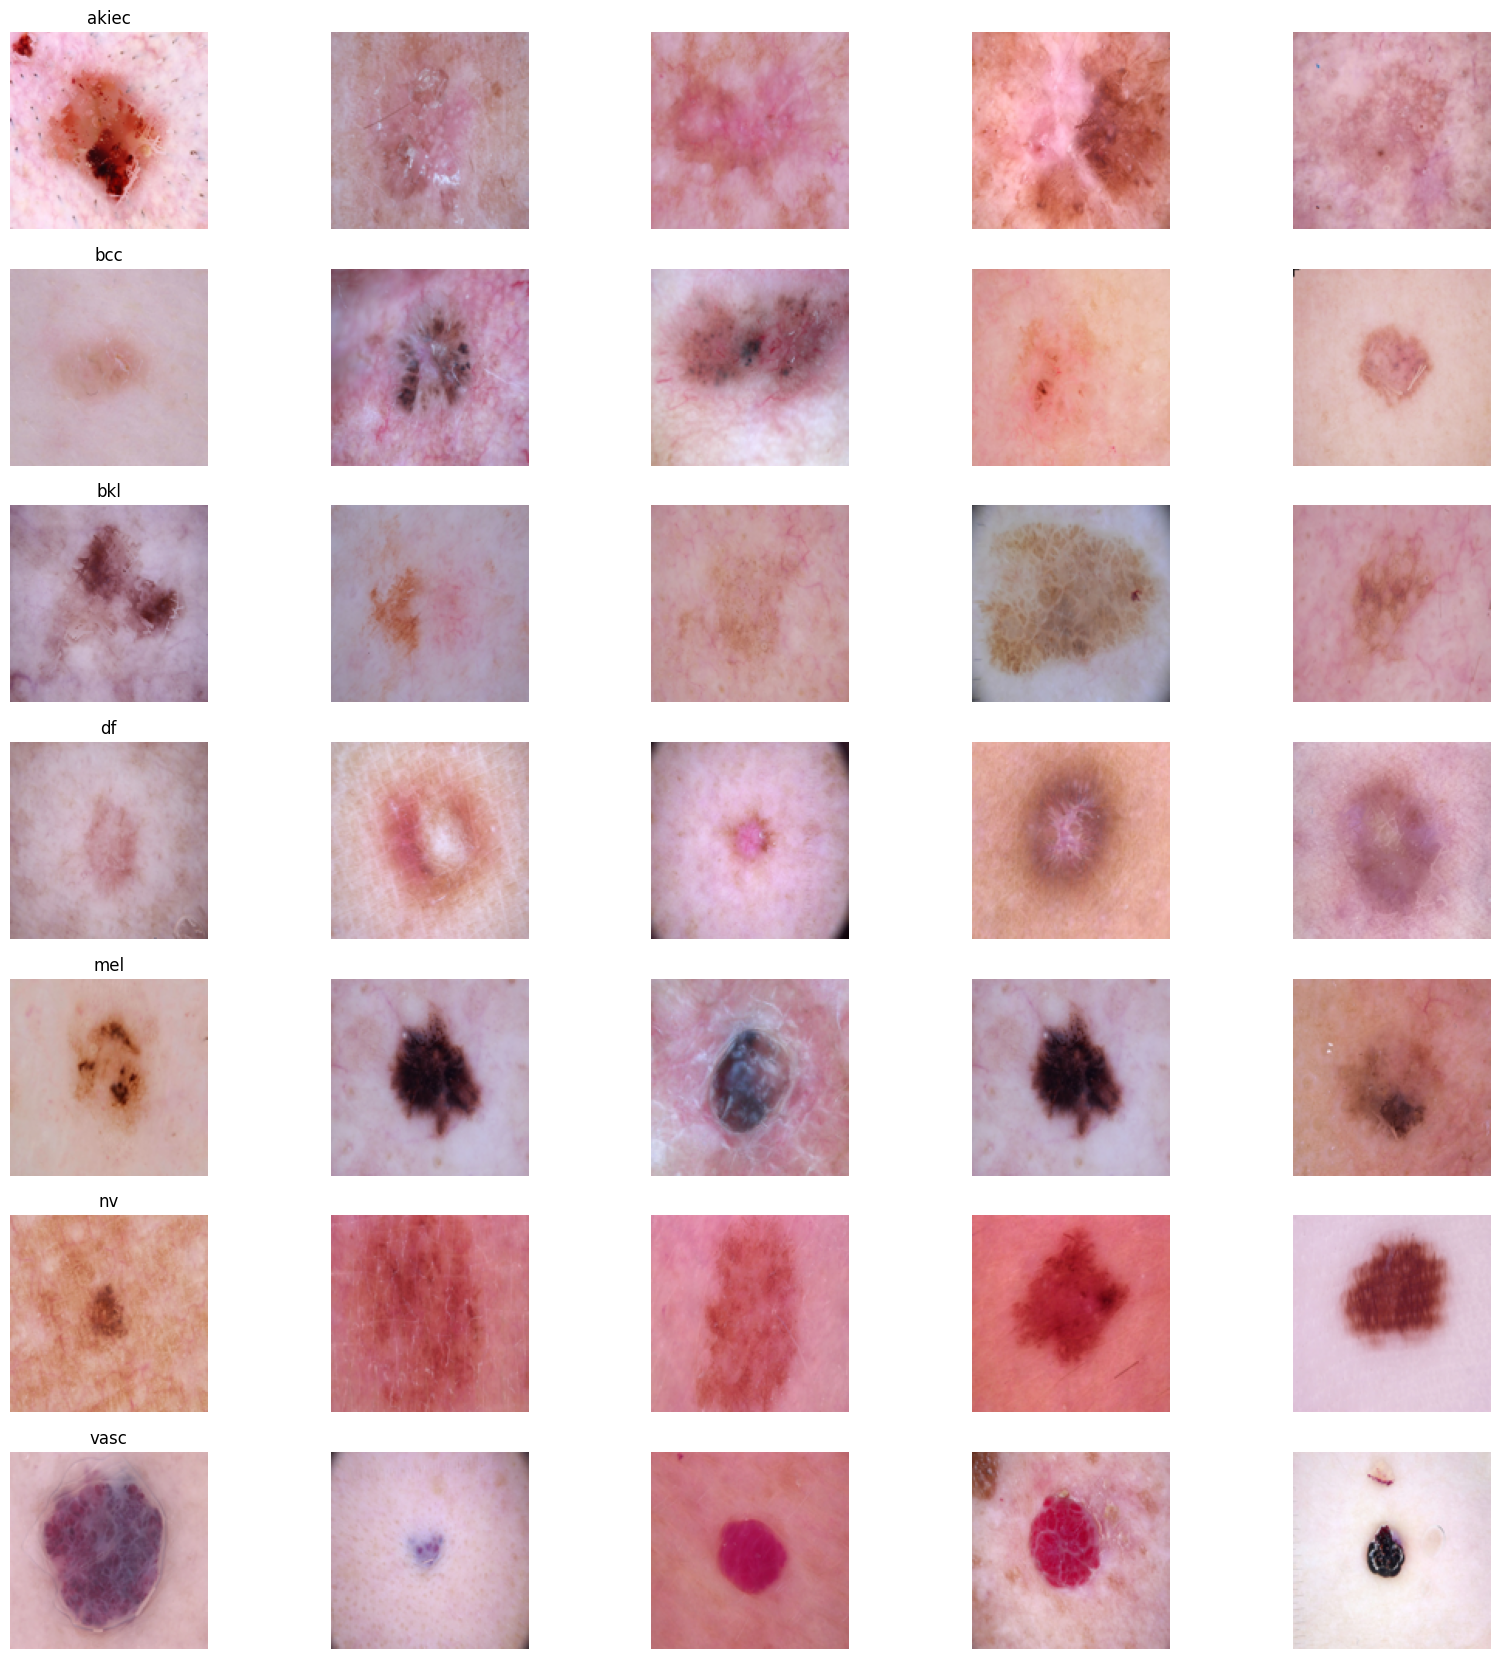

In [ ]:
n_samples = 5

fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')


In [ ]:
import numpy as np
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255.
Y=skin_df_balanced['label']
Y_cat = to_categorical(Y, num_classes=7)
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))


In [ ]:
import numpy as np
from keras.applications import VGG19
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))


In [ ]:
import numpy as np
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))


In [ ]:
import numpy as np

print("Shape of y_test:", y_test.shape)
print("Number of classes:", 7)

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Shape of y_test: (700, 7)
Number of classes: 7
22/22 [==============================] - 1s 43ms/step - loss: 0.6872 - accuracy: 0.7886
Test Loss: 0.687213659286499
Test Accuracy: 0.7885714173316956


In [ ]:
model_path = '/content/drive/MyDrive/Skin Cancer/Model/vgg16base.h5'

model.save(model_path)

print("Model saved to:", model_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to: /content/drive/MyDrive/Skin Cancer/Model/vgg16base.h5


1/1 [==============================] - 0s 52ms/step


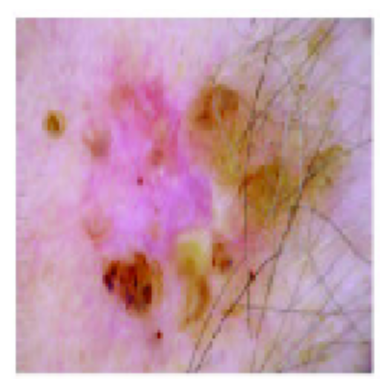

Predicted Class: bcc


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# model = load_model('/content/drive/MyDrive/Skin Cancer/Model/resnet_1.h5')

# image_path = '/content/drive/MyDrive/Skin Cancer/Skin Cancer/Skin Cancer/ISIC_0026827.jpg'
image_path = 'bcc.png'

img = image.load_img(image_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

img_array = img_array / 255.0

prediction = model.predict(img_array)

predicted_class = np.argmax(prediction)

class_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

plt.imshow(img)
plt.axis('off')
plt.show()

print("Predicted Class:", class_labels[predicted_class])


#VGG16

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/100
88/88 [==============================] - 13s 106ms/step - loss: 1.5663 - accuracy: 0.4154 - val_loss: 1.3697 - val_accuracy: 0.4871
Epoch 2/100
88/88 [==============================] - 5s 55ms/step - loss: 1.2817 - accuracy: 0.5125 - val_loss: 1.2402 - val_accuracy: 0.5386
Epoch 3/100
88/88 [==============================] - 5s 56ms/step - loss: 1.1454 - accuracy: 0.5814 - val_loss: 1.1385 - val_accuracy: 0.5786
Epoch 4/100
88/88 [==============================] - 4s 50ms/step - loss: 1.0317 - accuracy: 0.6382 - val_loss: 1.0555 - val_accuracy: 0.6300
Epoch 5/100
88/88 [==============================] - 5s 55ms/step - loss: 0.9575 - accuracy: 0.6782 - val_loss: 1.0517 - val_accuracy: 0.5986
Epoch 6/100
88/88 [==============================] - 5s 52ms/step - loss: 0.8888 - accuracy: 0.7036 - val_loss: 1.0341 - val_accuracy: 0.6314
Epoch 7/100
88/88 [==============================] - 5s 55ms/step - loss: 0.8543 

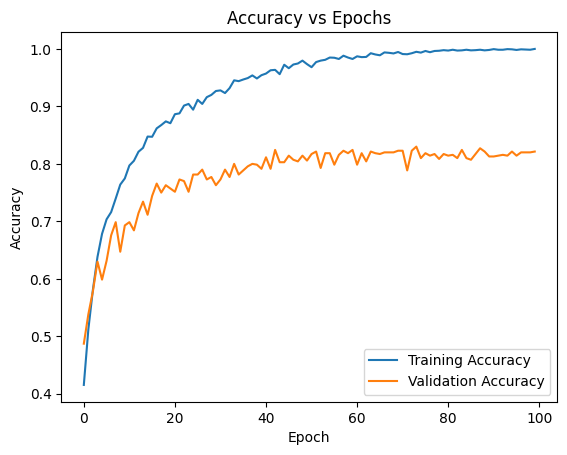

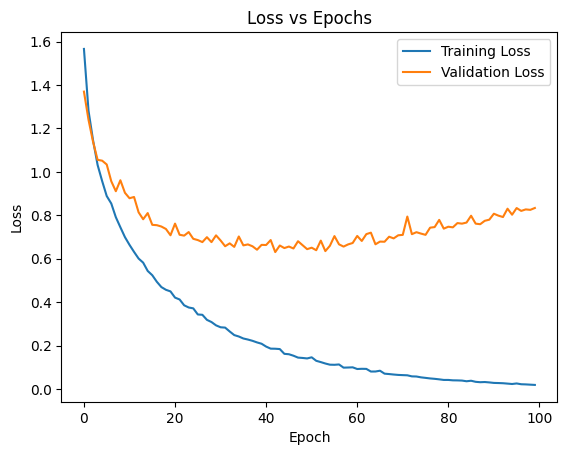

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = History()

model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=[history])

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()


In [ ]:
import numpy as np

print("Shape of y_test:", y_test.shape)
print("Number of classes:", 7)

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Shape of y_test: (700, 7)
Number of classes: 7
22/22 [==============================] - 1s 44ms/step - loss: 0.8339 - accuracy: 0.8214
Test Loss: 0.8338531255722046
Test Accuracy: 0.8214285969734192


In [ ]:
model_path = '/content/drive/MyDrive/Skin Cancer/Model/vgg16.h5'

model.save(model_path)

print("Model saved to:", model_path)

Model saved to: /content/drive/MyDrive/Skin Cancer/Model/vgg16.h5


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix

predicted_probs = model.predict(x_test)
predicted_labels = np.argmax(predicted_probs, axis=1)

ground_truth = np.argmax(y_test, axis=1)

cm = confusion_matrix(ground_truth, predicted_labels)

print(cm)


22/22 [==============================] - 1s 42ms/step
[[105   2  10   0   7   2   0]
 [ 13  79   4   1   6   1   1]
 [  6   3  65   3  11   7   0]
 [  0   0   0 101   0   0   0]
 [  1   1   9   1  65  10   0]
 [  0   3   4   2  16  63   1]
 [  0   0   0   0   0   1  96]]


22/22 [==============================] - 1s 44ms/step


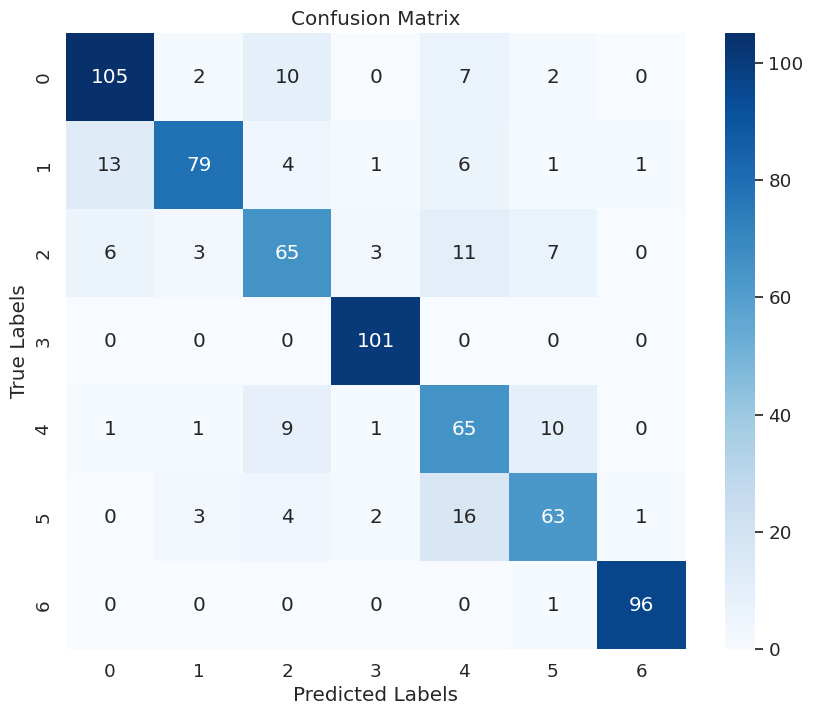

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


predicted_probs = model.predict(x_test)
predicted_labels = np.argmax(predicted_probs, axis=1)

ground_truth = np.argmax(y_test, axis=1)

cm = confusion_matrix(ground_truth, predicted_labels)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy for class akiec: 0.8333333333333334
Accuracy for class bcc: 0.7523809523809524
Accuracy for class bkl: 0.6842105263157895
Accuracy for class df: 1.0
Accuracy for class mel: 0.7471264367816092
Accuracy for class nv: 0.7078651685393258
Accuracy for class vasc: 0.9896907216494846


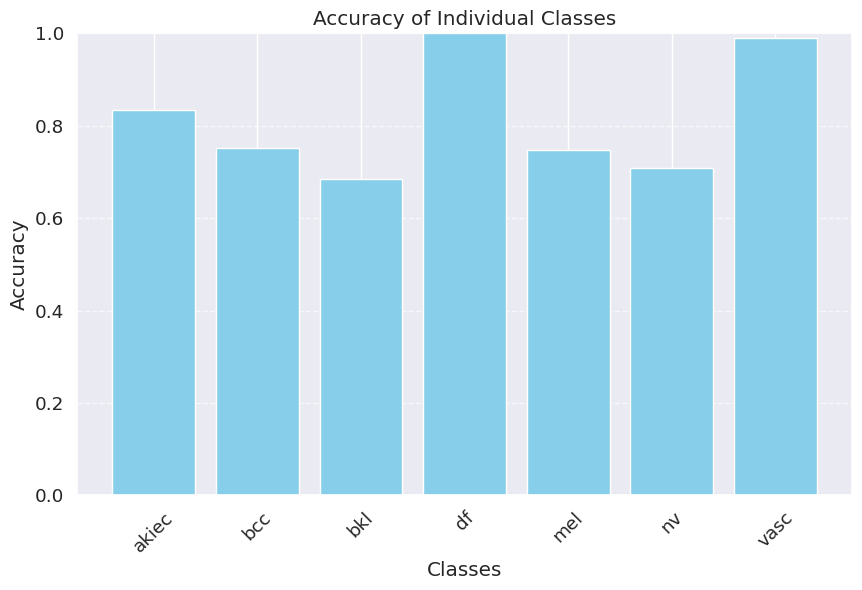

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

class_accuracy = np.diag(cm) / np.sum(cm, axis=1)

for i, cls in enumerate(classes):
    print(f'Accuracy for class {cls}: {class_accuracy[i]}')

plt.figure(figsize=(10, 6))
plt.bar(classes, class_accuracy, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy of Individual Classes')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)

y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)

precision = precision_score(y_true, y_pred, average='weighted')

recall = recall_score(y_true, y_pred, average='weighted')

f1 = f1_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


22/22 [==============================] - 1s 42ms/step
Accuracy: 0.82
Precision: 0.8246593139089704
Recall: 0.82
F1 Score: 0.819838457566798


In [ ]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/Skin Cancer/Model/vgg16.h5'

model = load_model(model_path)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               4194816   
                                                                 
 dense_5 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 18913095 (72.15 MB)
Trainable params: 4198407 (16.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
from keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

base_model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

#RESNET50

94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/100
88/88 [==============================] - 16s 94ms/step - loss: 1.9958 - accuracy: 0.1536 - val_loss: 1.9287 - val_accuracy: 0.1643
Epoch 2/100
88/88 [==============================] - 5s 55ms/step - loss: 1.9539 - accuracy: 0.1789 - val_loss: 1.9086 - val_accuracy: 0.1886
Epoch 3/100
88/88 [==============================] - 4s 46ms/step - loss: 1.9361 - accuracy: 0.1971 - val_loss: 1.9394 - val_accuracy: 0.1957
Epoch 4/100
88/88 [==============================] - 4s 46ms/step - loss: 1.9141 - accuracy: 0.2096 - val_loss: 1.8774 - val_accuracy: 0.2114
Epoch 5/100
88/88 [==============================] - 5s 55ms/step - loss: 1.8968 - accuracy: 0.2193 - val_loss: 1.8899 - val_accuracy: 0.1586
Epoch 6/100
88/88 [==============================] - 5s 53ms/step - loss: 1.8849 - accuracy: 0.2271 - val_loss: 1.8579 - val_accuracy: 0.2671
Epoch 7/100
88/88 [==============================] - 5s 53ms/step - loss: 1.8793 -

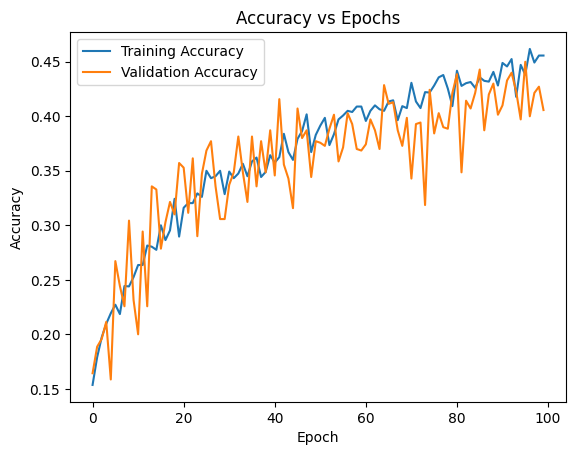

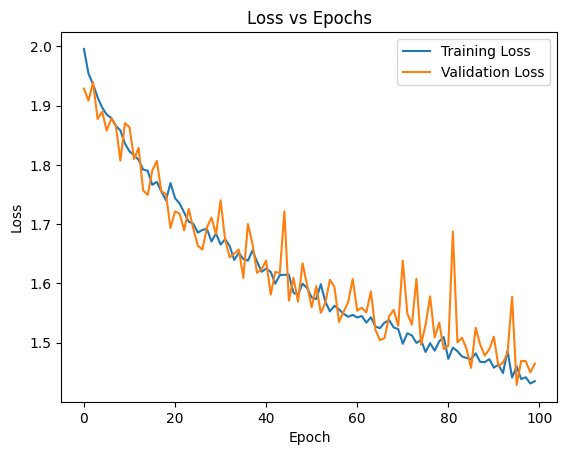

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = History()

model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=[history])

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()


In [ ]:
import numpy as np

print("Shape of y_test:", y_test.shape)
print("Number of classes:", 7)

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Shape of y_test: (700, 7)
Number of classes: 7
22/22 [==============================] - 1s 38ms/step - loss: 1.4645 - accuracy: 0.4057
Test Loss: 1.4645345211029053
Test Accuracy: 0.4057142734527588


22/22 [==============================] - 2s 39ms/step


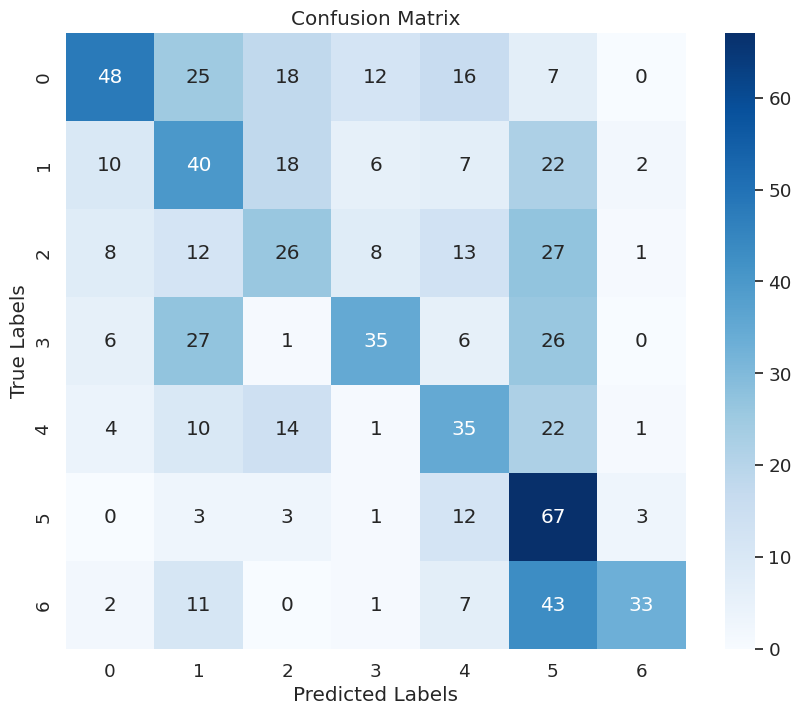

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



predicted_probs = model.predict(x_test)
predicted_labels = np.argmax(predicted_probs, axis=1)

ground_truth = np.argmax(y_test, axis=1)

cm = confusion_matrix(ground_truth, predicted_labels)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy for class akiec: 0.38095238095238093
Accuracy for class bcc: 0.38095238095238093
Accuracy for class bkl: 0.2736842105263158
Accuracy for class df: 0.3465346534653465
Accuracy for class mel: 0.40229885057471265
Accuracy for class nv: 0.7528089887640449
Accuracy for class vasc: 0.3402061855670103


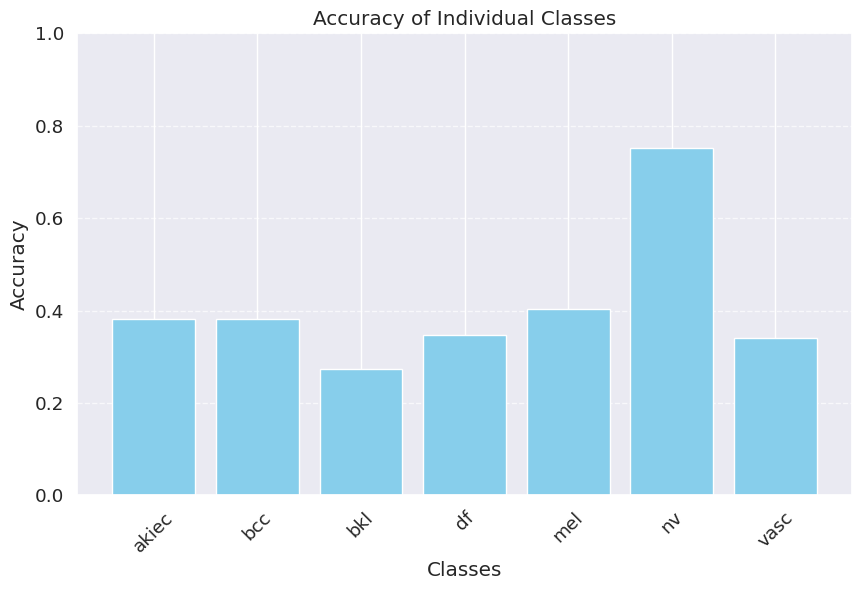

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

class_accuracy = np.diag(cm) / np.sum(cm, axis=1)

for i, cls in enumerate(classes):
    print(f'Accuracy for class {cls}: {class_accuracy[i]}')

plt.figure(figsize=(10, 6))
plt.bar(classes, class_accuracy, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy of Individual Classes')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)

y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)

precision = precision_score(y_true, y_pred, average='weighted')

recall = recall_score(y_true, y_pred, average='weighted')

f1 = f1_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


22/22 [==============================] - 1s 45ms/step
Accuracy: 0.4057142857142857
Precision: 0.4800979607425285
Recall: 0.4057142857142857
F1 Score: 0.4082728965364638


#AlexNet

Epoch 1/50
88/88 [==============================] - 13s 45ms/step - loss: 1.9452 - accuracy: 0.1521 - val_loss: 1.9036 - val_accuracy: 0.1271
Epoch 2/50
88/88 [==============================] - 2s 24ms/step - loss: 1.8033 - accuracy: 0.2254 - val_loss: 1.9593 - val_accuracy: 0.1371
Epoch 3/50
88/88 [==============================] - 2s 25ms/step - loss: 1.7197 - accuracy: 0.2554 - val_loss: 1.6818 - val_accuracy: 0.2900
Epoch 4/50
88/88 [==============================] - 2s 24ms/step - loss: 1.6171 - accuracy: 0.3200 - val_loss: 1.5505 - val_accuracy: 0.3200
Epoch 5/50
88/88 [==============================] - 2s 26ms/step - loss: 1.4849 - accuracy: 0.3568 - val_loss: 1.4402 - val_accuracy: 0.3686
Epoch 6/50
88/88 [==============================] - 2s 26ms/step - loss: 1.4302 - accuracy: 0.3918 - val_loss: 1.4243 - val_accuracy: 0.4043
Epoch 7/50
88/88 [==============================] - 2s 24ms/step - loss: 1.3846 - accuracy: 0.4071 - val_loss: 1.3400 - val_accuracy: 0.4429
Epoch 8/50
8

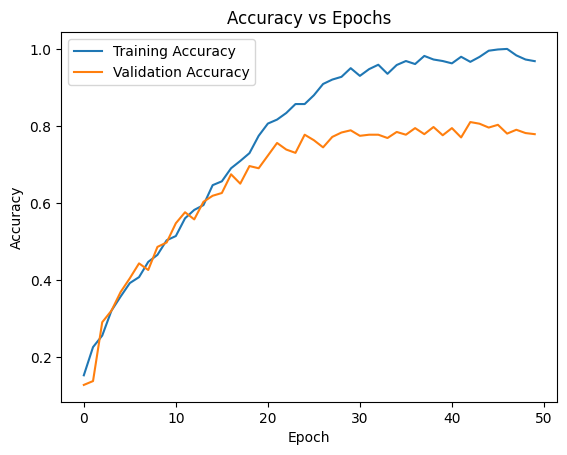

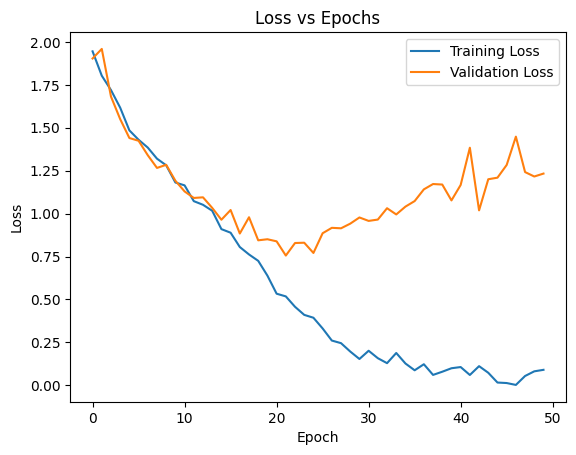

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import History

model = Sequential()

model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = History()

model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[history])

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()


In [ ]:
import numpy as np

print("Shape of y_test:", y_test.shape)
print("Number of classes:", 7)

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Shape of y_test: (700, 7)
Number of classes: 7
22/22 [==============================] - 0s 10ms/step - loss: 1.2332 - accuracy: 0.7786
Test Loss: 1.2331844568252563
Test Accuracy: 0.7785714268684387


In [ ]:
model_path = '/content/drive/MyDrive/Skin Cancer/Model/alexnet.h5'

model.save(model_path)

print("Model saved to:", model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to: /content/drive/MyDrive/Skin Cancer/Model/alexnet.h5


22/22 [==============================] - 0s 9ms/step


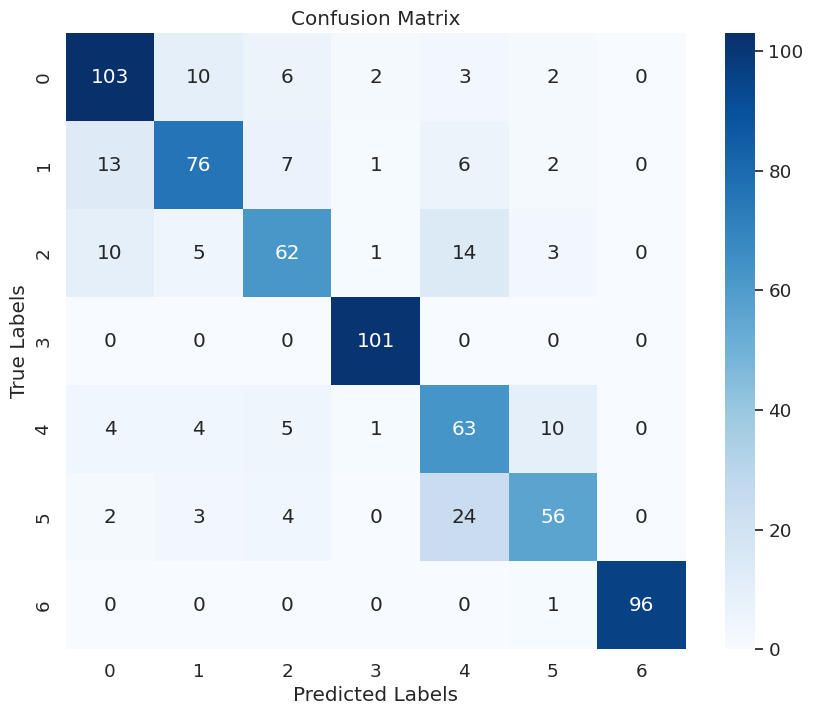

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predicted_probs = model.predict(x_test)
predicted_labels = np.argmax(predicted_probs, axis=1)

ground_truth = np.argmax(y_test, axis=1)

cm = confusion_matrix(ground_truth, predicted_labels)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy for class akiec: 0.8174603174603174
Accuracy for class bcc: 0.7238095238095238
Accuracy for class bkl: 0.6526315789473685
Accuracy for class df: 1.0
Accuracy for class mel: 0.7241379310344828
Accuracy for class nv: 0.6292134831460674
Accuracy for class vasc: 0.9896907216494846


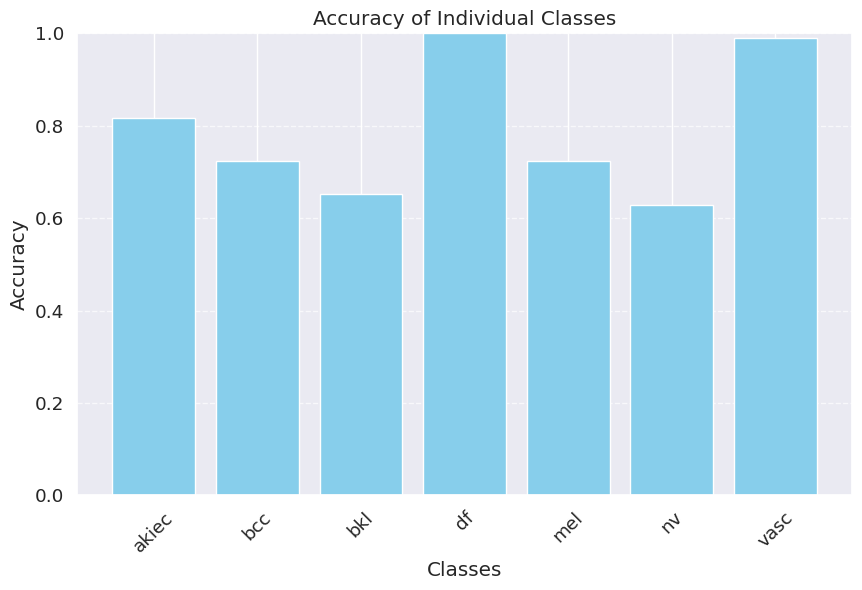

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

class_accuracy = np.diag(cm) / np.sum(cm, axis=1)

for i, cls in enumerate(classes):
    print(f'Accuracy for class {cls}: {class_accuracy[i]}')

plt.figure(figsize=(10, 6))
plt.bar(classes, class_accuracy, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy of Individual Classes')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)

y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)

precision = precision_score(y_true, y_pred, average='weighted')

recall = recall_score(y_true, y_pred, average='weighted')

f1 = f1_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


22/22 [==============================] - 0s 9ms/step
Accuracy: 0.7957142857142857
Precision: 0.800400391430041
Recall: 0.7957142857142857
F1 Score: 0.7955589096680428


In [ ]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/Skin Cancer/Model/alexnet.h5'

model = load_model(model_path)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 384)         1

#MobileNet

17225924/17225924 [==============================] - 0s 0us/step
Epoch 1/40
88/88 [==============================] - 7s 44ms/step - loss: 1.5223 - accuracy: 0.4296 - val_loss: 1.2056 - val_accuracy: 0.5614
Epoch 2/40
88/88 [==============================] - 2s 26ms/step - loss: 1.0506 - accuracy: 0.6364 - val_loss: 1.0402 - val_accuracy: 0.6200
Epoch 3/40
88/88 [==============================] - 2s 27ms/step - loss: 0.8804 - accuracy: 0.7057 - val_loss: 0.9458 - val_accuracy: 0.6643
Epoch 4/40
88/88 [==============================] - 2s 27ms/step - loss: 0.7727 - accuracy: 0.7475 - val_loss: 0.8707 - val_accuracy: 0.6957
Epoch 5/40
88/88 [==============================] - 2s 23ms/step - loss: 0.6865 - accuracy: 0.7868 - val_loss: 0.8259 - val_accuracy: 0.7057
Epoch 6/40
88/88 [==============================] - 2s 26ms/step - loss: 0.6147 - accuracy: 0.8168 - val_loss: 0.7762 - val_accuracy: 0.7343
Epoch 7/40
88/88 [==============================] - 2s 25ms/step - loss: 0.5621 - accurac

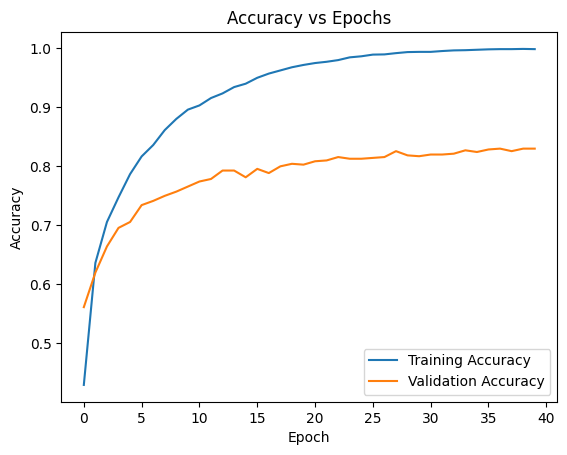

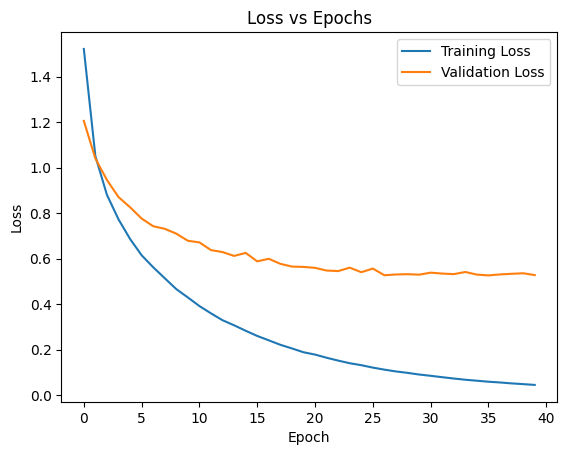

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import MobileNet
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras.callbacks import History


base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = History()

model.fit(x_train, y_train, epochs=40, batch_size=32, validation_data=(x_test, y_test), callbacks=[history])

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()


In [ ]:
import numpy as np

print("Shape of y_test:", y_test.shape)
print("Number of classes:", 7)

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Shape of y_test: (700, 7)
Number of classes: 7
22/22 [==============================] - 0s 18ms/step - loss: 0.5276 - accuracy: 0.8300
Test Loss: 0.5276122093200684
Test Accuracy: 0.8299999833106995


In [ ]:
model_path = '/content/drive/MyDrive/Skin Cancer/Model/mobilenet.h5'

model.save(model_path)

print("Model saved to:", model_path)

Model saved to: /content/drive/MyDrive/Skin Cancer/Model/mobilenet.h5


22/22 [==============================] - 1s 16ms/step


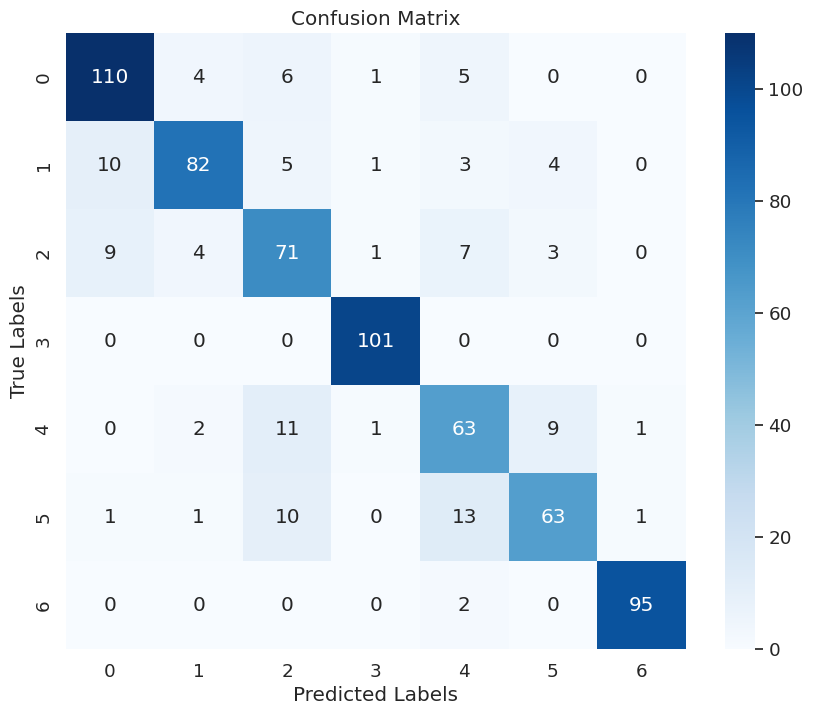

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predicted_probs = model.predict(x_test)
predicted_labels = np.argmax(predicted_probs, axis=1)

ground_truth = np.argmax(y_test, axis=1)

cm = confusion_matrix(ground_truth, predicted_labels)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy for class akiec: 0.873015873015873
Accuracy for class bcc: 0.780952380952381
Accuracy for class bkl: 0.7473684210526316
Accuracy for class df: 1.0
Accuracy for class mel: 0.7241379310344828
Accuracy for class nv: 0.7078651685393258
Accuracy for class vasc: 0.979381443298969


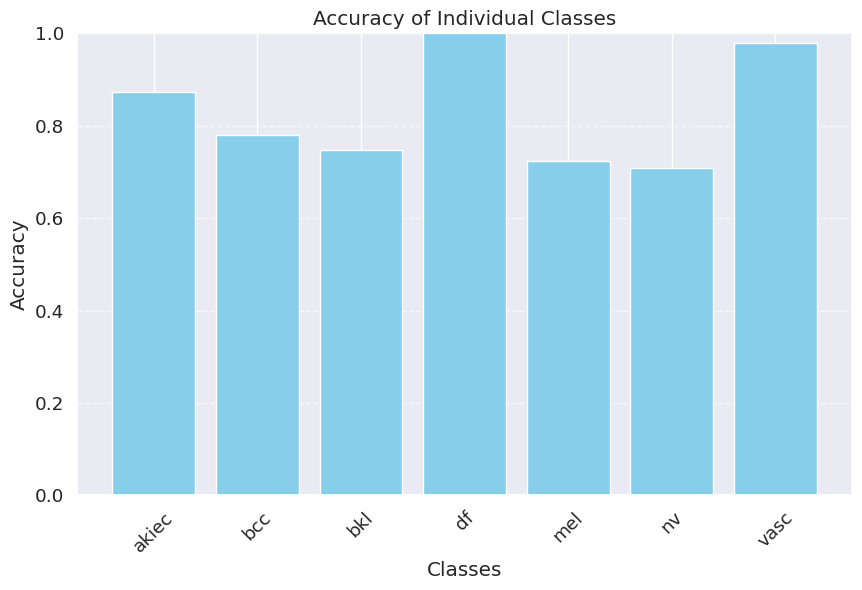

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

class_accuracy = np.diag(cm) / np.sum(cm, axis=1)

for i, cls in enumerate(classes):
    print(f'Accuracy for class {cls}: {class_accuracy[i]}')

plt.figure(figsize=(10, 6))
plt.bar(classes, class_accuracy, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy of Individual Classes')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)

y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)

precision = precision_score(y_true, y_pred, average='weighted')

recall = recall_score(y_true, y_pred, average='weighted')

f1 = f1_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


22/22 [==============================] - 1s 23ms/step
Accuracy: 0.8357142857142857
Precision: 0.8382057357679019
Recall: 0.8357142857142857
F1 Score: 0.835815850074952


In [ ]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/Skin Cancer/Model/mobilenet.h5'

model = load_model(model_path)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functi  (None, 4, 4, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 3757255 (14.33 MB)
Trainable params: 528391 (2.02 MB)
Non-trainable params: 3228864 (12.32 MB)
_________________________________________________________________


In [ ]:
from keras.applications import MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

base_model.summary()


17225924/17225924 [==============================] - 2s 0us/step
Model: "mobilenet_1.00_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 64, 64, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 64, 64, 32)        288       
 )                                                               
                                                 

#DenseNet121

29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/100
88/88 [==============================] - 25s 131ms/step - loss: 1.6417 - accuracy: 0.3857 - val_loss: 1.3691 - val_accuracy: 0.5271
Epoch 2/100
88/88 [==============================] - 4s 50ms/step - loss: 1.2382 - accuracy: 0.5736 - val_loss: 1.2027 - val_accuracy: 0.6029
Epoch 3/100
88/88 [==============================] - 4s 50ms/step - loss: 1.0872 - accuracy: 0.6304 - val_loss: 1.1061 - val_accuracy: 0.6300
Epoch 4/100
88/88 [==============================] - 5s 55ms/step - loss: 0.9907 - accuracy: 0.6696 - val_loss: 1.0433 - val_accuracy: 0.6400
Epoch 5/100
88/88 [==============================] - 4s 44ms/step - loss: 0.9101 - accuracy: 0.7050 - val_loss: 0.9724 - val_accuracy: 0.6757
Epoch 6/100
88/88 [==============================] - 4s 50ms/step - loss: 0.8484 - accuracy: 0.7271 - val_loss: 0.9377 - val_accuracy: 0.6957
Epoch 7/100
88/88 [==============================] - 4s 48ms/step - loss: 0.7964 

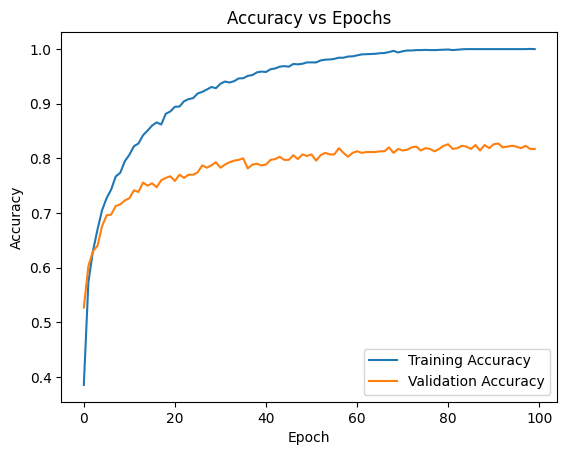

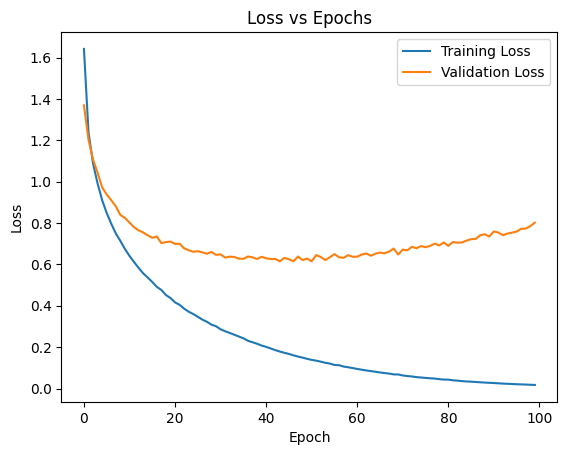

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import DenseNet121
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from tensorflow.keras.callbacks import History


base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = History()

model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=[history])

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()


In [ ]:
import numpy as np

print("Shape of y_test:", y_test.shape)
print("Number of classes:", 7)

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Shape of y_test: (700, 7)
Number of classes: 7
22/22 [==============================] - 1s 44ms/step - loss: 0.8021 - accuracy: 0.8171
Test Loss: 0.802106499671936
Test Accuracy: 0.8171428442001343


In [ ]:
model_path = '/content/drive/MyDrive/Skin Cancer/Model/densenet.h5'

model.save(model_path)

print("Model saved to:", model_path)

Model saved to: /content/drive/MyDrive/Skin Cancer/Model/densenet.h5


22/22 [==============================] - 3s 34ms/step


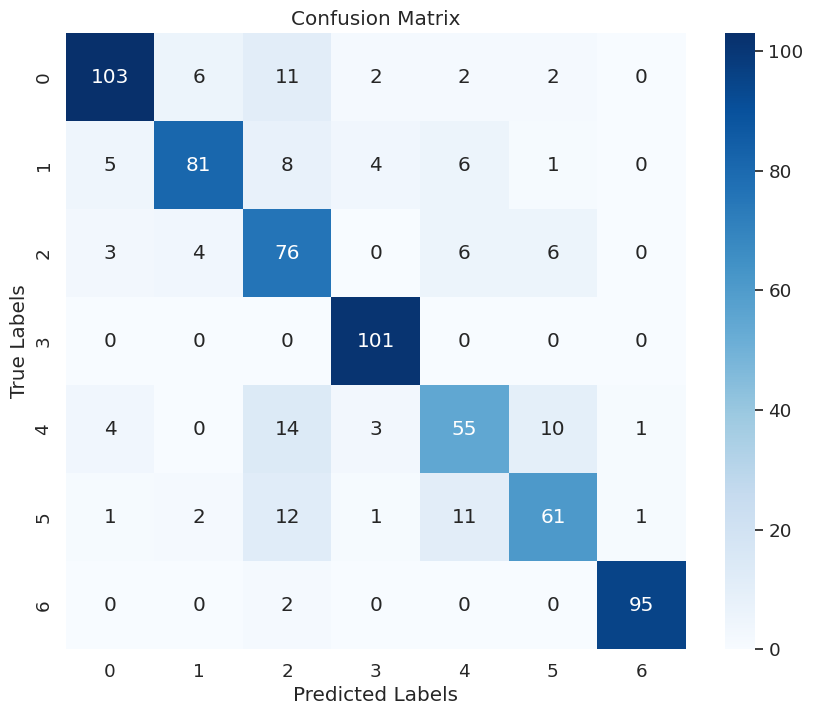

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predicted_probs = model.predict(x_test)
predicted_labels = np.argmax(predicted_probs, axis=1)

ground_truth = np.argmax(y_test, axis=1)

cm = confusion_matrix(ground_truth, predicted_labels)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy for class akiec: 0.8174603174603174
Accuracy for class bcc: 0.7714285714285715
Accuracy for class bkl: 0.8
Accuracy for class df: 1.0
Accuracy for class mel: 0.632183908045977
Accuracy for class nv: 0.6853932584269663
Accuracy for class vasc: 0.979381443298969


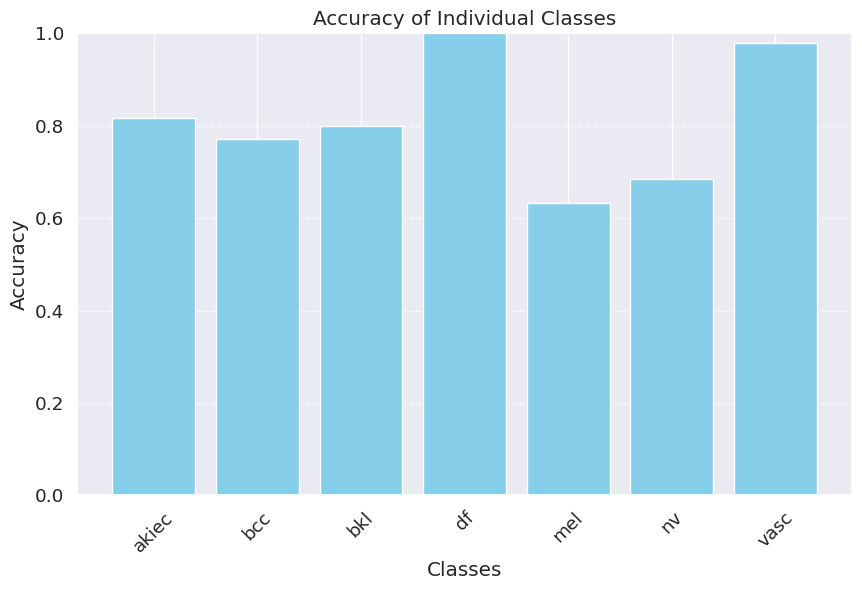

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

class_accuracy = np.diag(cm) / np.sum(cm, axis=1)

for i, cls in enumerate(classes):
    print(f'Accuracy for class {cls}: {class_accuracy[i]}')

plt.figure(figsize=(10, 6))
plt.bar(classes, class_accuracy, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy of Individual Classes')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)

y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)

precision = precision_score(y_true, y_pred, average='weighted')

recall = recall_score(y_true, y_pred, average='weighted')

f1 = f1_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


22/22 [==============================] - 1s 34ms/step
Accuracy: 0.8171428571428572
Precision: 0.8237228730583203
Recall: 0.8171428571428572
F1 Score: 0.8174194005064429


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 global_average_pooling2d_1  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 dense_9 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 7565895 (28.86 MB)
Trainable params: 528391 (2.02 MB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________
